In [1]:
import os
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
from numpy.random import choice
import geopandas as gpd
import earthpy as et
import datetime as dt

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [3]:
sjer_plot_locations = gpd.read_file('/home/vdo/Downloads/September_2018_Cargo_Tracks.shp')

In [4]:
sjer_plot_locations.shape

(533577, 28)

In [5]:
sjer_plot_locations.head()

,OBJECTID,TRACKID,MMSI,ELP_SEC,ST_DATE,EN_DATE,SOGPT1,SOGPT2,AVG_SOG,DISTSPDKTS,...,Fuel_Type,Fuel_Categ,Oil_Cargo_,Oil_Cargo1,Fuel_Capac,Oil_Carg_1,F9,Shape_Leng,DISTSPDKM,geometry
0,1,0.0,209109000,5.0,2018-09-10 22:42:23,2018-09-10 22:42:28,11.7,11.8,11.8,7.2,...,Low Sulfur Fuel Oil,Heavy Floater,N/A,N/A,=1.81*10^6+(-5713*Length)+(5.92*Length)^2',N/A,None,18.510487,22,LINESTRING (1009186.073899999 331727.304199999...
1,2,1.0,209109000,53.0,2018-09-10 22:42:28,2018-09-10 22:43:21,11.8,11.9,11.9,11.9,...,Low Sulfur Fuel Oil,Heavy Floater,N/A,N/A,=1.81*10^6+(-5713*Length)+(5.92*Length)^2',N/A,None,324.508015,22,"LINESTRING (1009201.6467 331737.3104999997, 10..."
2,3,2.0,209109000,169.0,2018-09-10 22:43:21,2018-09-10 22:46:10,11.9,11.9,11.9,12.1,...,Low Sulfur Fuel Oil,Heavy Floater,N/A,N/A,=1.81*10^6+(-5713*Length)+(5.92*Length)^2',N/A,None,1048.430250,22,"LINESTRING (1009483.9781 331897.2930999994, 10..."
3,4,3.0,209109000,46.0,2018-09-10 22:46:10,2018-09-10 22:46:56,11.9,12.1,12.0,12.1,...,Low Sulfur Fuel Oil,Heavy Floater,N/A,N/A,=1.81*10^6+(-5713*Length)+(5.92*Length)^2',N/A,None,285.784024,22,LINESTRING (1010401.274499999 332405.006899999...
4,5,4.0,209109000,9.0,2018-09-10 22:46:56,2018-09-10 22:47:05,12.1,12.0,12.1,10.7,...,Low Sulfur Fuel Oil,Heavy Floater,N/A,N/A,=1.81*10^6+(-5713*Length)+(5.92*Length)^2',N/A,None,49.516635,22,"LINESTRING (1010648.4014 332548.5366999991, 10..."


In [6]:
for c in sjer_plot_locations.columns:
    print(c)

OBJECTID
TRACKID
MMSI
ELP_SEC
ST_DATE
EN_DATE
SOGPT1
SOGPT2
AVG_SOG
DISTSPDKTS
SEG_LEN_KM
COARSE_TYP
SIMPLE_TYP
IMO
LENGTH
OBJECTID_1
AIS_Numeri
AIS_Shipty
Fuel_Type
Fuel_Categ
Oil_Cargo_
Oil_Cargo1
Fuel_Capac
Oil_Carg_1
F9
Shape_Leng
DISTSPDKM
geometry


In [7]:
sjer_plot_locations.geometry

0         LINESTRING (1009186.073899999 331727.304199999...
1         LINESTRING (1009201.6467 331737.3104999997, 10...
2         LINESTRING (1009483.9781 331897.2930999994, 10...
3         LINESTRING (1010401.274499999 332405.006899999...
4         LINESTRING (1010648.4014 332548.5366999991, 10...
                                ...                        
533572    LINESTRING (1240605.2652 356043.8478999995, 12...
533573    LINESTRING (1240771.4081 355933.5546000004, 12...
533574    LINESTRING (1242768.457699999 354447.005799999...
533575    LINESTRING (1244290.4827 353259.1302000005, 12...
533576    LINESTRING (1247415.304400001 350791.126800000...
Name: geometry, Length: 533577, dtype: object

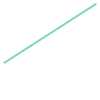

In [8]:
sjer_plot_locations.geometry[0]

In [10]:
type(sjer_plot_locations.geometry[0])

shapely.geometry.linestring.LineString

In [9]:
sjer_plot_locations.geometry[0].coords[:]

[(1009186.0738999993, 331727.3041999992),
 (1009201.6467000004, 331737.3104999997)]